In [1]:
import pandas as pd
import numpy as np

In [49]:
!pip install scikitplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [50]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score

#from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score

In [57]:
df1=pd.read_csv('/content/drive/MyDrive/cat_team/ojt python/Proactive Attrition Management-Logistic Regression Case Study.csv')

In [ ]:
#Logistic Regression Business Case

In [58]:
df1.head()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,MILMIL414,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,NaN
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,PITHOM412,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,NaN
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,OKCTUL918,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,NaN
3,62.13,97.50,65.99,2.48,0.00,0.0,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,OKCOKC405,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,NaN
4,25.23,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,SANMCA210,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,NaN


In [ ]:
data_size=len(df1)
print(data_size)


In [ ]:
print(df1.columns)

In [59]:
print(pd.unique(df1['CHURNDEP']))
#count the number of each entry
print(df1['CHURNDEP'].value_counts())
print(df1['CHURNDEP'].nunique())
print(df1['CHURNDEP'].isna().sum())

[nan  0.  1.]
0.0    20000
1.0    20000
Name: CHURNDEP, dtype: int64
2
31047


In [60]:
dftest=df1[df1['CHURNDEP'].isna()]
print(len(dftest))
dftest.head()

31047


,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,MILMIL414,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,NaN
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,PITHOM412,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,NaN
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,OKCTUL918,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,NaN
3,62.13,97.50,65.99,2.48,0.00,0.0,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,OKCOKC405,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,NaN
4,25.23,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,SANMCA210,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,NaN


In [61]:
dftrain=df1[~df1['CHURNDEP'].isna()]
dftrain.head()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
31047,38.00,7.50,38.00,0.00,0.0,0.0,-1.50,0.00,0.00,0.00,0.0,0.00,0.00,0.41,0.33,0.00,1.33,3.67,0.00,0.0,0.00,0,60,1,1,MILMIL414,1.0,1.0,1812.0,1000004,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,6,0,0,1,0.00,0,1,0.0
31048,55.23,570.50,71.98,0.00,0.0,0.0,38.50,0.00,9.67,0.67,77.0,8.67,0.00,106.33,14.67,0.67,97.33,90.33,10.33,0.0,0.00,0,57,1,1,NNYSYR315,6.0,4.0,434.0,1000005,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,6,0,2,0,79.99,0,1,0.0
31049,38.05,682.50,52.49,0.25,0.0,0.0,147.50,-3.06,9.00,1.67,13.0,0.67,0.00,42.20,6.67,0.00,33.33,53.00,10.67,0.0,0.67,0,53,1,1,OKCTUL918,3.0,2.0,231.0,1000008,28.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,29.99,0,1,0.0
31050,97.34,1039.00,50.00,4.95,419.5,0.0,198.00,23.26,12.67,3.00,176.0,11.33,0.33,213.85,103.33,0.33,238.33,192.33,15.67,0.0,4.00,0,55,1,1,MILMIL414,3.0,3.0,700.0,1000009,38.0,24.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,3,0,9.99,0,1,0.0
31051,35.30,24.25,34.98,0.00,0.0,0.0,19.75,-0.31,0.00,0.00,1.0,0.00,0.00,2.39,4.00,1.67,9.33,1.67,0.00,0.0,0.00,0,53,3,3,SANMCA210,4.0,3.0,544.0,1000012,36.0,34.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,9,0,0,0,79.99,0,1,0.0


In [62]:
dftrain['CHURN'].value_counts()

0    20000
1    20000
Name: CHURN, dtype: int64

In [63]:
dftest['CHURN'].value_counts()

0    30438
1      609
Name: CHURN, dtype: int64

In [64]:
print(len(dftrain.columns))
dftrain = dftrain.dropna(axis=1)
print(len(dftrain.columns))

78
67


In [65]:
print(len(dftest.columns))
dftest=dftest.dropna(axis=1)
print(len(dftest.columns))

78
63


In [ ]:
dftrain.columns


In [ ]:
dftest.columns

In [66]:
set1=set(dftrain.columns)
set2=set(dftest.columns)
print(set1,set2)

{'UNIQSUBS', 'CALIBRAT', 'RETACCPT', 'CREDITA', 'NEWCELLN', 'MARRYYES', 'PEAKVCE', 'CALLWAIT', 'CREDITZ', 'PRIZMRUR', 'MAILFLAG', 'SETPRCM', 'CREDITAA', 'INCALLS', 'DROPBLK', 'OPEAKVCE', 'OCCCRFT', 'CUSTCARE', 'PCOWN', 'CHURN', 'EQPDAYS', 'CREDITB', 'CREDITC', 'WEBCAP', 'NEWCELLY', 'CUSTOMER', 'PRIZMTWN', 'OWNRENT', 'INCOME', 'BLCKVCE', 'CHILDREN', 'CREDITGY', 'MARRYNO', 'MOUREC', 'CREDITDE', 'MAILORD', 'TRAVEL', 'DROPVCE', 'CHURNDEP', 'INCMISS', 'ACTVSUBS', 'REFURB', 'OCCCLER', 'UNANSVCE', 'MARRYUN', 'CREDITAD', 'OCCHMKR', 'MONTHS', 'PRIZMUB', 'CREDITCD', 'RETCALL', 'OCCRET', 'PHONES', 'RV', 'MCYCLE', 'SETPRC', 'RETCALLS', 'MAILRES', 'OUTCALLS', 'TRUCK', 'REFER', 'OCCSELF', 'THREEWAY', 'MODELS', 'CALLFWDV', 'OCCSTUD', 'OCCPROF'} {'UNIQSUBS', 'CALIBRAT', 'RETACCPT', 'CREDITA', 'NEWCELLN', 'MARRYYES', 'PEAKVCE', 'CALLWAIT', 'CREDITZ', 'PRIZMRUR', 'MAILFLAG', 'SETPRCM', 'CREDITAA', 'INCALLS', 'DROPBLK', 'OPEAKVCE', 'OCCCRFT', 'CUSTCARE', 'PCOWN', 'CHURN', 'CREDITB', 'CREDITC', 'WEBCAP', 

In [67]:
s1=set1.intersection(set2)
print(len(s1))

63


In [68]:
s1=list(s1)
dftrain=dftrain[s1]
dftest=dftest[s1]
print(len(dftrain.columns))
print(len(dftrain['CHURN']))

63
40000


In [ ]:
print(len(df1.columns))

In [69]:
dftrain.head()

,UNIQSUBS,CALIBRAT,CREDITA,NEWCELLN,MARRYYES,PEAKVCE,CALLWAIT,CREDITZ,MAILFLAG,PRIZMRUR,SETPRCM,CREDITAA,OCCPROF,INCALLS,DROPBLK,OPEAKVCE,OCCCRFT,CUSTCARE,PCOWN,CHURN,CREDITB,CREDITC,WEBCAP,NEWCELLY,CUSTOMER,PRIZMTWN,OWNRENT,INCOME,BLCKVCE,CREDITGY,MAILORD,MARRYNO,MOUREC,CREDITDE,CHILDREN,DROPVCE,INCMISS,ACTVSUBS,REFURB,OCCCLER,UNANSVCE,MARRYUN,CREDITAD,OCCHMKR,MONTHS,PRIZMUB,CREDITCD,RETCALL,OCCRET,MCYCLE,RV,SETPRC,RETCALLS,MAILRES,OUTCALLS,TRUCK,REFER,OCCSELF,THREEWAY,TRAVEL,CALLFWDV,OCCSTUD,RETACCPT
31047,1,1,0,0,1,1.33,0.00,0,0,0,1,0,0,0.00,0.00,3.67,1,0.00,0,0,1,0,0,1,1000004,1,1,6,0.00,0,0,0,0.41,0,1,0.00,0,1,0,0,0.0,0,0,0,60,0,1,0,0,0,0,0.00,0,0,0.33,0,0,0,0.00,0,0.0,0,0
31048,1,1,1,0,0,97.33,0.00,0,0,0,0,0,1,0.67,10.33,90.33,0,8.67,1,0,0,0,1,1,1000005,0,0,6,0.67,0,0,1,106.33,0,0,9.67,0,1,0,0,77.0,0,2,0,57,0,1,0,0,0,0,79.99,0,0,14.67,0,0,0,0.00,0,0.0,0,0
31049,1,1,0,0,1,33.33,0.67,0,0,0,0,0,0,0.00,10.67,53.00,0,0.67,0,0,1,0,1,1,1000008,0,0,1,1.67,0,0,0,42.20,0,0,9.00,0,1,0,0,13.0,0,1,0,53,0,1,0,0,0,0,29.99,0,0,6.67,0,0,0,0.00,1,0.0,0,0
31050,1,1,0,0,1,238.33,4.00,0,0,0,0,0,0,0.33,15.67,192.33,1,11.33,0,0,1,0,0,1,1000009,0,1,4,3.00,0,0,0,213.85,0,0,12.67,0,1,0,0,176.0,0,3,0,55,1,0,0,0,0,0,9.99,0,0,103.33,0,0,0,0.33,0,0.0,0,0
31051,3,1,1,0,1,9.33,0.00,0,0,0,0,0,0,1.67,0.00,1.67,0,0.00,0,0,0,0,1,1,1000012,0,0,9,0.00,0,0,0,2.39,0,1,0.00,0,3,0,0,1.0,0,0,0,53,0,1,0,0,0,0,79.99,0,0,4.00,0,0,0,0.00,0,0.0,0,0


In [70]:
dftest.head()

,UNIQSUBS,CALIBRAT,CREDITA,NEWCELLN,MARRYYES,PEAKVCE,CALLWAIT,CREDITZ,MAILFLAG,PRIZMRUR,SETPRCM,CREDITAA,OCCPROF,INCALLS,DROPBLK,OPEAKVCE,OCCCRFT,CUSTCARE,PCOWN,CHURN,CREDITB,CREDITC,WEBCAP,NEWCELLY,CUSTOMER,PRIZMTWN,OWNRENT,INCOME,BLCKVCE,CREDITGY,MAILORD,MARRYNO,MOUREC,CREDITDE,CHILDREN,DROPVCE,INCMISS,ACTVSUBS,REFURB,OCCCLER,UNANSVCE,MARRYUN,CREDITAD,OCCHMKR,MONTHS,PRIZMUB,CREDITCD,RETCALL,OCCRET,MCYCLE,RV,SETPRC,RETCALLS,MAILRES,OUTCALLS,TRUCK,REFER,OCCSELF,THREEWAY,TRAVEL,CALLFWDV,OCCSTUD,RETACCPT
0,1,0,0,1,0,83.67,5.67,0,0,0,0,0,0,6.33,9.33,157.00,0,1.67,0,0,0,0,1,0,1000002,0,1,5,1.00,0,1,1,55.28,1,0,8.33,0,1,0,0,61.33,0,1,0,56,0,1,0,0,0,1,149.99,0,1,46.33,1,0,0,0.33,0,0.0,0,0
1,2,0,0,0,0,555.67,22.67,0,0,0,0,0,0,147.00,59.67,303.67,0,4.33,0,0,0,1,1,1,1000006,0,0,6,7.67,0,1,1,200.32,0,0,52.00,0,2,0,0,76.00,0,0,0,59,0,1,0,0,0,0,9.99,0,1,370.33,0,0,0,1.33,0,0.0,0,0
2,2,0,1,1,1,1.67,0.00,0,0,0,0,0,0,0.00,1.00,1.67,0,0.00,0,0,0,0,1,0,1000010,0,0,9,1.00,0,1,0,0.00,0,0,0.00,0,2,0,0,2.33,0,1,0,57,0,1,0,0,0,0,29.99,0,1,0.00,0,0,1,0.00,1,0.0,0,0
3,2,0,1,0,0,7.67,0.00,0,0,0,0,0,1,0.00,0.33,7.33,0,4.00,0,0,0,0,1,1,1000011,0,0,6,0.33,0,1,1,0.00,0,1,0.00,0,2,0,0,4.00,0,0,0,59,0,1,0,0,0,0,29.99,0,1,3.67,0,0,0,0.00,0,0.0,0,0
4,2,0,1,0,0,0.67,0.00,0,0,0,0,0,0,0.00,0.00,0.67,0,0.00,0,0,0,0,1,1,1000014,0,1,7,0.00,0,0,0,1.13,0,0,0.00,0,2,0,0,0.33,1,0,0,53,0,0,0,0,0,0,29.99,0,0,0.33,1,0,0,0.00,0,0.0,0,0


In [72]:
dftrain.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 31047 to 71046
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UNIQSUBS  40000 non-null  int64  
 1   CALIBRAT  40000 non-null  int64  
 2   CREDITA   40000 non-null  int64  
 3   NEWCELLN  40000 non-null  int64  
 4   MARRYYES  40000 non-null  int64  
 5   PEAKVCE   40000 non-null  float64
 6   CALLWAIT  40000 non-null  float64
 7   CREDITZ   40000 non-null  int64  
 8   MAILFLAG  40000 non-null  int64  
 9   PRIZMRUR  40000 non-null  int64  
 10  SETPRCM   40000 non-null  int64  
 11  CREDITAA  40000 non-null  int64  
 12  OCCPROF   40000 non-null  int64  
 13  INCALLS   40000 non-null  float64
 14  DROPBLK   40000 non-null  float64
 15  OPEAKVCE  40000 non-null  float64
 16  OCCCRFT   40000 non-null  int64  
 17  CUSTCARE  40000 non-null  float64
 18  PCOWN     40000 non-null  int64  
 19  CHURN     40000 non-null  int64  
 20  CREDITB   40000 non-null

In [71]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31047 entries, 0 to 31046
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UNIQSUBS  31047 non-null  int64  
 1   CALIBRAT  31047 non-null  int64  
 2   CREDITA   31047 non-null  int64  
 3   NEWCELLN  31047 non-null  int64  
 4   MARRYYES  31047 non-null  int64  
 5   PEAKVCE   31047 non-null  float64
 6   CALLWAIT  31047 non-null  float64
 7   CREDITZ   31047 non-null  int64  
 8   MAILFLAG  31047 non-null  int64  
 9   PRIZMRUR  31047 non-null  int64  
 10  SETPRCM   31047 non-null  int64  
 11  CREDITAA  31047 non-null  int64  
 12  OCCPROF   31047 non-null  int64  
 13  INCALLS   31047 non-null  float64
 14  DROPBLK   31047 non-null  float64
 15  OPEAKVCE  31047 non-null  float64
 16  OCCCRFT   31047 non-null  int64  
 17  CUSTCARE  31047 non-null  float64
 18  PCOWN     31047 non-null  int64  
 19  CHURN     31047 non-null  int64  
 20  CREDITB   31047 non-null  in

In [73]:
train_target=dftrain['CHURN']
dftrain=dftrain.drop(['CHURN'],axis=1)

In [74]:
test_target=dftest['CHURN']
dftest=dftest.drop(['CHURN'],axis=1)

In [75]:
dftrain.head()

,UNIQSUBS,CALIBRAT,CREDITA,NEWCELLN,MARRYYES,PEAKVCE,CALLWAIT,CREDITZ,MAILFLAG,PRIZMRUR,SETPRCM,CREDITAA,OCCPROF,INCALLS,DROPBLK,OPEAKVCE,OCCCRFT,CUSTCARE,PCOWN,CREDITB,CREDITC,WEBCAP,NEWCELLY,CUSTOMER,PRIZMTWN,OWNRENT,INCOME,BLCKVCE,CREDITGY,MAILORD,MARRYNO,MOUREC,CREDITDE,CHILDREN,DROPVCE,INCMISS,ACTVSUBS,REFURB,OCCCLER,UNANSVCE,MARRYUN,CREDITAD,OCCHMKR,MONTHS,PRIZMUB,CREDITCD,RETCALL,OCCRET,MCYCLE,RV,SETPRC,RETCALLS,MAILRES,OUTCALLS,TRUCK,REFER,OCCSELF,THREEWAY,TRAVEL,CALLFWDV,OCCSTUD,RETACCPT
31047,1,1,0,0,1,1.33,0.00,0,0,0,1,0,0,0.00,0.00,3.67,1,0.00,0,1,0,0,1,1000004,1,1,6,0.00,0,0,0,0.41,0,1,0.00,0,1,0,0,0.0,0,0,0,60,0,1,0,0,0,0,0.00,0,0,0.33,0,0,0,0.00,0,0.0,0,0
31048,1,1,1,0,0,97.33,0.00,0,0,0,0,0,1,0.67,10.33,90.33,0,8.67,1,0,0,1,1,1000005,0,0,6,0.67,0,0,1,106.33,0,0,9.67,0,1,0,0,77.0,0,2,0,57,0,1,0,0,0,0,79.99,0,0,14.67,0,0,0,0.00,0,0.0,0,0
31049,1,1,0,0,1,33.33,0.67,0,0,0,0,0,0,0.00,10.67,53.00,0,0.67,0,1,0,1,1,1000008,0,0,1,1.67,0,0,0,42.20,0,0,9.00,0,1,0,0,13.0,0,1,0,53,0,1,0,0,0,0,29.99,0,0,6.67,0,0,0,0.00,1,0.0,0,0
31050,1,1,0,0,1,238.33,4.00,0,0,0,0,0,0,0.33,15.67,192.33,1,11.33,0,1,0,0,1,1000009,0,1,4,3.00,0,0,0,213.85,0,0,12.67,0,1,0,0,176.0,0,3,0,55,1,0,0,0,0,0,9.99,0,0,103.33,0,0,0,0.33,0,0.0,0,0
31051,3,1,1,0,1,9.33,0.00,0,0,0,0,0,0,1.67,0.00,1.67,0,0.00,0,0,0,1,1,1000012,0,0,9,0.00,0,0,0,2.39,0,1,0.00,0,3,0,0,1.0,0,0,0,53,0,1,0,0,0,0,79.99,0,0,4.00,0,0,0,0.00,0,0.0,0,0


In [76]:
print(len(dftrain))
print(len(train_target))

40000
40000


Text(0.5, 0, 'CHURN ')

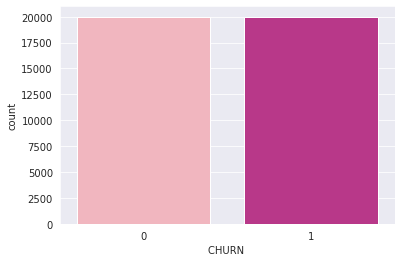

In [77]:
sns.countplot(x = train_target, palette= 'RdPu')
plt.xlabel('CHURN ')

In [78]:
test_target.value_counts()

0    30438
1      609
Name: CHURN, dtype: int64

In [79]:
lr = LogisticRegression(random_state = 0)
lr.fit(dftrain, train_target)
y_pred = lr.predict(dftest)
train_pred = lr.predict(dftrain)

In [81]:
cm = confusion_matrix(test_target, y_pred)
print(cm)
accuracy_score(test_target, y_pred)

[[11389 19049]
 [  183   426]]


0.3805520662221793